In [1]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# supress warnings/error messages in terminal

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
# load data from mnist dataset(60k training, 10k test)

(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [4]:

# reshape and convert to one-hot
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [5]:
# split main training set into train/validation sets (6k out of 60k data points reserved for validation)
x_validate = x_train[:6000, :]
y_validate = y_train[:6000, :]
x_train = x_train[6000:, :]
y_train = y_train[6000:, :]

In [6]:
'''
Building layers for the feedforward NN:
Hidden layers have 56, 96, 96, and 56 nodes, in that order.
Takes in 784 values (pixel input) and outputs 10 values (predicted probability for each number, 0-9).
'''

model = models.Sequential()
model.add(layers.Dense(56,activation='relu',input_shape=(784,)))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(96,activation='relu'))
model.add(layers.Dense(56,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',
			  optimizer='adam',
			  metrics=['accuracy'])

In [8]:
# Training the Neural network

epochs = 5
history = model.fit(x_train,y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print("Finished fitting.")

Epoch 1/5
106/106 - 10s - loss: 2.7041 - accuracy: 0.6703 - val_loss: 0.6555 - val_accuracy: 0.8258 - 10s/epoch - 91ms/step
Epoch 2/5
106/106 - 3s - loss: 0.5273 - accuracy: 0.8505 - val_loss: 0.4378 - val_accuracy: 0.8812 - 3s/epoch - 31ms/step
Epoch 3/5
106/106 - 5s - loss: 0.3581 - accuracy: 0.8960 - val_loss: 0.3494 - val_accuracy: 0.9058 - 5s/epoch - 45ms/step
Epoch 4/5
106/106 - 4s - loss: 0.2748 - accuracy: 0.9172 - val_loss: 0.3040 - val_accuracy: 0.9185 - 4s/epoch - 38ms/step
Epoch 5/5
106/106 - 4s - loss: 0.2286 - accuracy: 0.9311 - val_loss: 0.2697 - val_accuracy: 0.9252 - 4s/epoch - 34ms/step
Finished fitting.


Text(0, 0.5, 'Accuracy')

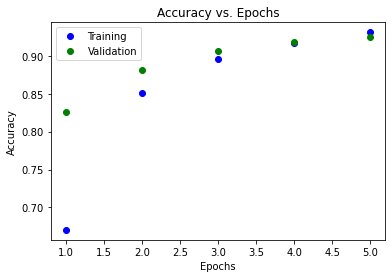

In [13]:
# Plottig learnings curves during training(on both training and validation data)

epoch_labels  =range(1, epochs+1)
hist_dict = history.history
plt.title("Accuracy vs. Epochs")
plt.plot(epoch_labels, hist_dict["accuracy"], 'bo', label = 'Training')
plt.plot(epoch_labels, hist_dict["val_accuracy"], 'go', label = 'Validation')
plt.legend(loc = 'best')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [14]:
# Evaluating final performance using data

print("Checking accuracy on test set....")

acc = model.evaluate(x_test, y_test, batch_size = 512)
print("\nAccuracy on test set: " + str(acc[1]))
plt.show()

Checking accuracy on test set....
20/20 [==============================] - 1s 28ms/step - loss: 0.2890 - accuracy: 0.9169

Accuracy on test set: 0.9168999791145325
